In [1]:
import os
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\CP


In [2]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf

# Data Reading

In [4]:
import os

dataset_path = './datasets/IMG_CLASSES'
data = []

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_dir, file_name)
                data.append({'Image': image_path, 'Label': class_name})

In [5]:
print(image_path)

./datasets/IMG_CLASSES\9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k\v-tinea-versicolor-97.jpg


In [6]:
df = pd.DataFrame(data)

In [7]:
print(df.head())

                                            Image           Label
0   ./datasets/IMG_CLASSES\1. Eczema 1677\0_0.jpg  1. Eczema 1677
1   ./datasets/IMG_CLASSES\1. Eczema 1677\0_1.jpg  1. Eczema 1677
2  ./datasets/IMG_CLASSES\1. Eczema 1677\0_10.jpg  1. Eczema 1677
3  ./datasets/IMG_CLASSES\1. Eczema 1677\0_11.jpg  1. Eczema 1677
4  ./datasets/IMG_CLASSES\1. Eczema 1677\0_12.jpg  1. Eczema 1677


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27153 entries, 0 to 27152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   27153 non-null  object
 1   Label   27153 non-null  object
dtypes: object(2)
memory usage: 424.4+ KB
None


# EDA

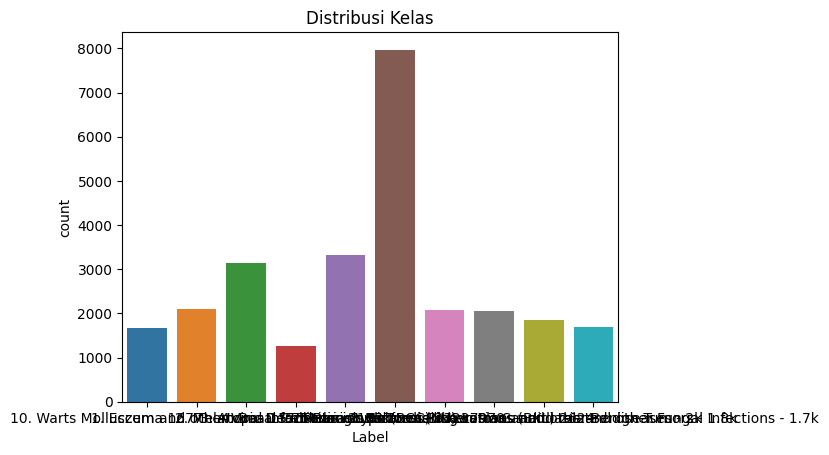

In [9]:
sns.countplot(data=df, x='Label')
plt.title('Distribusi Kelas')
plt.show()

In [10]:
class_stats = df.groupby('Label').size().reset_index(name='Count')
print(class_stats)

                                               Label  Count
0                                     1. Eczema 1677   1677
1  10. Warts Molluscum and other Viral Infections...   2103
2                                 2. Melanoma 15.75k   3140
3                       3. Atopic Dermatitis - 1.25k   1257
4                 4. Basal Cell Carcinoma (BCC) 3323   3323
5                    5. Melanocytic Nevi (NV) - 7970   7970
6        6. Benign Keratosis-like Lesions (BKL) 2624   2079
7  7. Psoriasis pictures Lichen Planus and relate...   2055
8  8. Seborrheic Keratoses and other Benign Tumor...   1847
9  9. Tinea Ringworm Candidiasis and other Fungal...   1702


In [11]:
df.describe()

Image   
count                                           27153  \
unique                                          27153   
top     ./datasets/IMG_CLASSES\1. Eczema 1677\0_0.jpg   
freq                                                1   

                                  Label  
count                             27153  
unique                               10  
top     5. Melanocytic Nevi (NV) - 7970  
freq                               7970

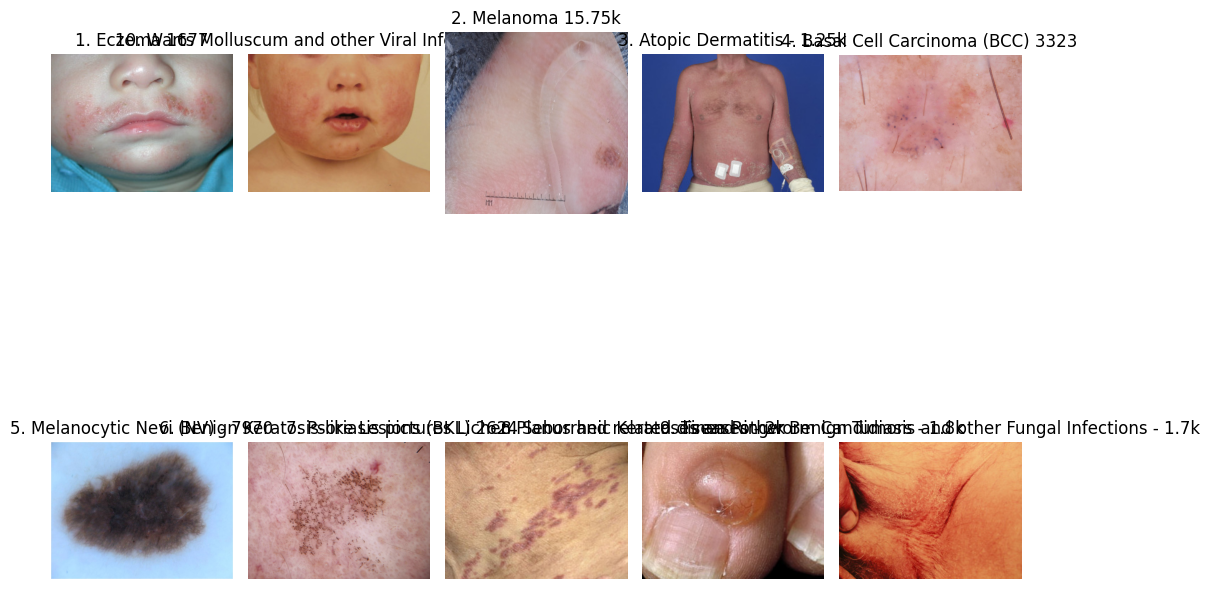

In [12]:
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_stats['Label']):
    image_path = df.loc[df['Label'] == class_name, 'Image'].iloc[0]
    img = plt.imread(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
# !pip install opencv-python

# Pre Processing

In [14]:
# conda install -c anaconda pillow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
# pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import os
from PIL import Image

dataset_path = './datasets/IMG_CLASSES'
output_path = './RESIZED_IMAGES'
target_size = (100, 100)  # Ubah ukuran target sesuai kebutuhan Anda

# Buat direktori output jika belum ada
if not os.path.exists(output_path):
    os.makedirs(output_path)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        output_class_dir = os.path.join(output_path, class_name)
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_dir, file_name)
                output_image_path = os.path.join(output_class_dir, file_name)

                # Resize gambar dan simpan dalam direktori output
                image = Image.open(image_path)
                resized_image = image.resize(target_size)
                resized_image.save(output_image_path)

                print(f"Resized {image_path} to {output_image_path}")

print("Resize selesai.")


Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_0.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_0.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_1.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_1.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_10.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_10.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_11.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_11.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_12.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_12.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_13.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_13.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_14.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_14.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_15.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_15.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_16.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_16.jpg
Resized ./datasets/IMG_CLASSES\1. Eczema 1677\0_17.jpg to ./RESIZED_IMAGES\1. Eczema 1677\0_17.jpg
Resized ./data

# Data Prepare for Modelling

In [2]:
import os
import random
import shutil

dataset_path = './RESIZED_IMAGES'
train_data_path = './Train_DATA'
test_data_path = './Test_DATA'
train_ratio = 0.8  # Ubah rasio pelatihan sesuai kebutuhan Anda

# Buat direktori train dan test jika belum ada
if not os.path.exists(train_data_path):
    os.makedirs(train_data_path)
if not os.path.exists(test_data_path):
    os.makedirs(test_data_path)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        random.shuffle(images)
        train_count = int(len(images) * train_ratio)
        train_images = images[:train_count]
        test_images = images[train_count:]

        # Pindahkan gambar ke direktori train
        for image_name in train_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(train_data_path, class_name, image_name)
            if not os.path.exists(os.path.join(train_data_path, class_name)):
                os.makedirs(os.path.join(train_data_path, class_name))
            shutil.copyfile(src, dst)

        # Pindahkan gambar ke direktori test
        for image_name in test_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(test_data_path, class_name, image_name)
            if not os.path.exists(os.path.join(test_data_path, class_name)):
                os.makedirs(os.path.join(test_data_path, class_name))
            shutil.copyfile(src, dst)

print("Pemisahan dataset selesai.")

Pemisahan dataset selesai.


In [3]:
import os
import random
import shutil

train_data_path = './Train_DATA'
balanced_train_data_path = './Balanced_Train_DATA'

# Calculate desired number of samples per class
desired_samples_per_class = float('inf')  # Set an initial high value
for class_name in os.listdir(train_data_path):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        class_samples = len(os.listdir(class_dir))
        desired_samples_per_class = min(desired_samples_per_class, class_samples)

# Create directory for balanced training dataset
if not os.path.exists(balanced_train_data_path):
    os.makedirs(balanced_train_data_path)

# Undersample the data and copy selected samples to the balanced training dataset
for class_name in os.listdir(train_data_path):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        class_samples = os.listdir(class_dir)
        random.shuffle(class_samples)
        selected_samples = class_samples[:desired_samples_per_class]

        # Create directory for the class in the balanced training dataset
        output_class_dir = os.path.join(balanced_train_data_path, class_name)
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)

        # Copy selected samples to the balanced training dataset
        for sample_name in selected_samples:
            src = os.path.join(class_dir, sample_name)
            dst = os.path.join(output_class_dir, sample_name)
            shutil.copyfile(src, dst)

print("Undersampling and creating balanced training dataset completed.")

Undersampling and creating balanced training dataset completed.


In [4]:
import os

dataset_path = './Balanced_Train_DATA'

class_counts = {}

# Menghitung jumlah gambar untuk setiap kelas
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        class_counts[class_name] = len(images)

# Menampilkan distribusi dataset
for class_name, count in class_counts.items():
    print(f"Class: {class_name}\tCount: {count}")


Class: 1. Eczema 1677	Count: 1613
Class: 10. Warts Molluscum and other Viral Infections - 2103	Count: 1904
Class: 2. Melanoma 15.75k	Count: 2341
Class: 3. Atopic Dermatitis - 1.25k	Count: 1245
Class: 4. Basal Cell Carcinoma (BCC) 3323	Count: 2380
Class: 5. Melanocytic Nevi (NV) - 7970	Count: 2974
Class: 6. Benign Keratosis-like Lesions (BKL) 2624	Count: 1858
Class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k	Count: 1867
Class: 8. Seborrheic Keratoses and other Benign Tumors - 1.8k	Count: 1740
Class: 9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k	Count: 1645


In [5]:
validation_data_path = 'Validation_DATA'

if not os.path.exists(validation_data_path):
    os.makedirs(validation_data_path)

In [6]:
validation_ratio = 0.2  

for class_name in os.listdir(train_data_path):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        random.shuffle(images)
        validation_count = int(len(images) * validation_ratio)
        validation_images = images[:validation_count]

        # Pindahkan gambar ke direktori validasi
        for image_name in validation_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(validation_data_path, class_name, image_name)
            if not os.path.exists(os.path.join(validation_data_path, class_name)):
                os.makedirs(os.path.join(validation_data_path, class_name))
            shutil.copyfile(src, dst)

In [7]:
train_data_path = './Balanced_Train_DATA'
validation_data_path = './Validation_DATA'
test_data_path = './Test_DATA'

def count_data(directory):
    total_count = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            total_count += len(images)
    return total_count

# Menghitung jumlah data pada setiap subset
train_count = count_data(train_data_path)
validation_count = count_data(validation_data_path)
test_count = count_data(test_data_path)

# Menampilkan jumlah data pada setiap subset
print("Jumlah data pelatihan:", train_count)
print("Jumlah data validasi:", validation_count)
print("Jumlah data pengujian:", test_count)

Jumlah data pelatihan: 19567
Jumlah data validasi: 12377
Jumlah data pengujian: 13278


Model Architecture

In [8]:
import tensorflow as tf
from tensorflow.keras import layers

# Definisikan arsitektur model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

Modelling

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan path direktori data pelatihan dan validasi
train_dir = 'Balanced_Train_DATA'
validation_dir = 'Validation_DATA'

# Definisikan generator data untuk data pelatihan
train_data_generator = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse')

# Definisikan generator data untuk data validasi
validation_data_generator = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse')

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
epochs = 10

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)


Found 19567 images belonging to 10 classes.
Found 12377 images belonging to 10 classes.
Epoch 1/10
612/612 [==============================] - 129s 201ms/step - loss: 1.6431 - accuracy: 0.3893 - val_loss: 1.2289 - val_accuracy: 0.5468
Epoch 2/10
612/612 [==============================] - 42s 69ms/step - loss: 1.3577 - accuracy: 0.4860 - val_loss: 1.1702 - val_accuracy: 0.5687
Epoch 3/10
612/612 [==============================] - 42s 68ms/step - loss: 1.2420 - accuracy: 0.5246 - val_loss: 1.0233 - val_accuracy: 0.6229
Epoch 4/10
612/612 [==============================] - 40s 65ms/step - loss: 1.1415 - accuracy: 0.5657 - val_loss: 0.8959 - val_accuracy: 0.6741
Epoch 5/10
612/612 [==============================] - 39s 64ms/step - loss: 0.9977 - accuracy: 0.6207 - val_loss: 0.7592 - val_accuracy: 0.7279
Epoch 6/10
612/612 [==============================] - 40s 66ms/step - loss: 0.8434 - accuracy: 0.6828 - val_loss: 0.7012 - val_accuracy: 0.7422
Epoch 7/10
612/612 [==========================

Model Evaluation

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Prediksi label pada data validasi
validation_steps = len(validation_generator)
y_true = []
y_pred = []

for i in range(validation_steps):
    x_val, y_val = validation_generator[i]
    y_true.extend(y_val)
    y_pred.extend(np.argmax(model.predict(x_val), axis=1))

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)


1/1 [==============================] - 0s 62ms/step
Confusion Matrix:
[[ 689   19    0   13    0    0    1    6    7   19]
 [  19  867    2   12    2    1    1   14   35   17]
 [   2    7 1353    9    3   37    9    5    2    5]
 [   7   13    0  495    2    3    0   26    6   10]
 [   3    6    9   20 1229   79  135    3    4    6]
 [   2   15  179   29   48 3173  175    8   14    4]
 [   2    2   11    5   74   58  791    3    1    2]
 [  29   35    1   33    1    1    1  761   26   45]
 [   6   27    0   11    1    2    4    9  779   14]
 [   8   13    0   14    0    0    0   12   11  725]]


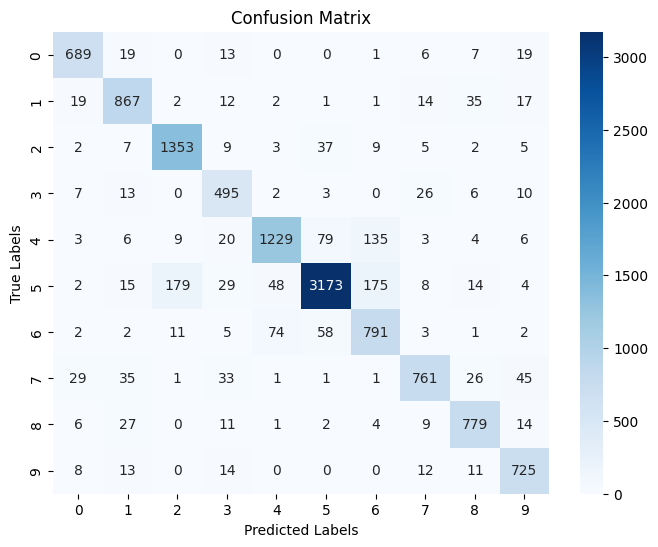

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan confusion matrix dalam bentuk plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)


True Positives (TP): 867
True Negatives (TN): 689
False Positives (FP): 19
False Negatives (FN): 19


In [13]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

# Menghitung presisi
precision = precision_score(y_true, y_pred, average='weighted')

# Menghitung akurasi
accuracy = accuracy_score(y_true, y_pred)

# Menghitung F1-score
f1score = f1_score(y_true, y_pred, average='weighted')

# Menampilkan hasil
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1-score:", f1score)


Precision: 0.882812044640759
Accuracy: 0.877595540114729
F1-score: 0.8784916761453327


In [14]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

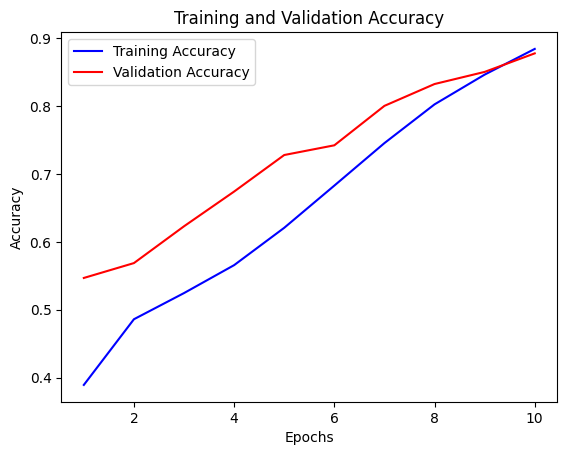

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


EVALUATION TEST DATA

In [16]:
test_dir = './Test_DATA'

# Definisikan generator data untuk data uji
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse')

# Evaluasi model menggunakan data uji
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 13278 images belonging to 10 classes.
415/415 [==============================] - 44s 104ms/step - loss: 0.5237 - accuracy: 0.8618
Test Loss: 0.5237249732017517
Test Accuracy: 0.8618015050888062


CONVERT MODEL

In [9]:

export_dir = 'saved_model/1'

tf.saved_model.save(model,export_dir=export_dir)


INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [10]:
mode = "Speed" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [11]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [13]:
# import pathlib
# import tensorflow as tf
# tflite_model_file = pathlib.Path('./model.tflite')
# tflite_model_file.write_bytes(tflite_model)

14850384

convert to .h5 format 

In [ ]:
model.save('my_model.h5')